<a href="https://colab.research.google.com/github/AYUSH-11/Machine-Learning/blob/main/Predict_the_poker_hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/Linear Regression"

/content/drive/My Drive/Colab Notebooks/Linear Regression


In [5]:
col_names=['s1','c1','s2','c2','s3','c3','s4','c4','s5','c5','classes' ]
dataset_train = pd.read_csv("poker-hand-training-true.data",names=col_names)
print(dataset_train)
dataset_train.shape

       s1  c1  s2  c2  s3  c3  s4  c4  s5  c5  classes
0       1  10   1  11   1  13   1  12   1   1        9
1       2  11   2  13   2  10   2  12   2   1        9
2       3  12   3  11   3  13   3  10   3   1        9
3       4  10   4  11   4   1   4  13   4  12        9
4       4   1   4  13   4  12   4  11   4  10        9
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..      ...
25005   3   9   2   6   4  11   4  12   2   4        0
25006   4   1   4  10   3  13   3   4   1  10        1
25007   2   1   2  10   4   4   4   1   4  13        1
25008   2  12   4   3   1  10   1  12   4   9        1
25009   1   7   3  11   3   3   4   8   3   7        1

[25010 rows x 11 columns]


(25010, 11)

In [6]:
dataset_test = pd.read_csv("poker-hand-testing.data",names=col_names)
print(dataset_test)
dataset_test.shape

        s1  c1  s2  c2  s3  c3  s4  c4  s5  c5  classes
0        1   1   1  13   2   4   2   3   1  12        0
1        3  12   3   2   3  11   4   5   2   5        1
2        1   9   4   6   1   4   3   2   3   9        1
3        1   4   3  13   2  13   2   1   3   6        1
4        3  10   2   7   1   2   2  11   4   9        0
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..      ...
999995   3   1   1  12   2   9   4   9   2   6        1
999996   3   3   4   5   2   7   1   4   4   3        1
999997   1  11   4   7   3   9   1  13   2   7        1
999998   3  11   1   8   1   1   3  13   2   8        1
999999   2   5   2   9   4   9   2   3   3   3        2

[1000000 rows x 11 columns]


(1000000, 11)

In [7]:
total_class = 10  
poker_data = {}
for i in range(total_class):
    poker_data[i] = len(dataset_train[dataset_train.classes==i])
print(poker_data)

# Giving name to diferent class to visulize it
poker_hands = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
hand_name = {
    0: 'Nothing in hand',
    1: 'One pair',
    2: 'Two pairs',
    3: 'Three of a kind',
    4: 'Straight',
    5: 'Flush',
    6: 'Full house',
    7: 'Four of a kind',
    8: 'Straight flush',
    9: 'Royal flush',
}

{0: 12493, 1: 10599, 2: 1206, 3: 513, 4: 93, 5: 54, 6: 36, 7: 6, 8: 5, 9: 5}


Text(0, 0.5, 'Number of Times Hand come to that nuber')

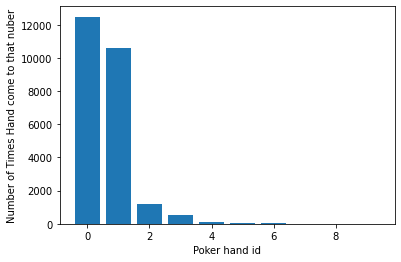

In [8]:
plt.bar(poker_hands, [poker_data[i] for i in poker_data], align='center')
plt.xlabel('Poker hand id')
plt.ylabel('Number of Times Hand come to that nuber')

In [9]:
dataset_train_feature = dataset_train.drop(['classes'], axis=1)
dataset_train_target = dataset_train['classes']

In [10]:
dataset_test_feature = dataset_test.drop(['classes'],axis=1)
dataset_test_target = dataset_test['classes']

In [11]:
# Calculating Root Mean Squared Error, Mean absolute Error and R-Square
def make_report(act , pred):
    print("Root mean squared error: ", sqrt(mse(act.values, pred)))
    print("R-squared: ", r2_score(act.values, pred))    # It represent How close the data are to fitted regression line.

In [12]:
# Importing required Libraries for implementing Regression Models and Calculating Accuracy on Test Dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve 

In [13]:
knc = KNeighborsClassifier(23)
knc.fit(dataset_train_feature,dataset_train_target)
print(classification_report(dataset_test_target, knc.predict(dataset_test_feature)))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.77      0.67    501209
           1       0.54      0.46      0.49    422498
           2       0.34      0.01      0.01     47622
           3       0.12      0.00      0.00     21121
           4       0.00      0.00      0.00      3885
           5       0.00      0.00      0.00      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.58   1000000
   macro avg       0.16      0.12      0.12   1000000
weighted avg       0.55      0.58      0.55   1000000



In [14]:
model = RandomForestClassifier(n_estimators=1000,random_state=0)
model.fit(dataset_train_feature,dataset_train_target)
print(classification_report(dataset_test_target, model.predict(dataset_test_feature)))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.65      0.83      0.72    501209
           1       0.59      0.50      0.54    422498
           2       0.44      0.00      0.01     47622
           3       0.54      0.00      0.00     21121
           4       0.25      0.00      0.00      3885
           5       1.00      0.00      0.01      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.63   1000000
   macro avg       0.35      0.13      0.13   1000000
weighted avg       0.61      0.63      0.59   1000000



In [15]:
# So as we get higher accuracy in Randomforest. Now we find accuracy for Testing data

In [16]:
model = RandomForestClassifier(n_estimators=1000,random_state=0)
model.fit(dataset_train_feature,dataset_train_target)
print(classification_report(dataset_test_target, model.predict(dataset_test_feature)))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.65      0.83      0.72    501209
           1       0.59      0.50      0.54    422498
           2       0.44      0.00      0.01     47622
           3       0.54      0.00      0.00     21121
           4       0.25      0.00      0.00      3885
           5       1.00      0.00      0.01      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.63   1000000
   macro avg       0.35      0.13      0.13   1000000
weighted avg       0.61      0.63      0.59   1000000

